# Amazon Stock Price

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


## 1. Importing Dataset
The data set can be found here = https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time

In [2]:
# Read and show the first 5 records of data
df = pd.read_csv("Amazon.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
# Show the last 5 records of data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6150,2021-10-21,3414.25000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.00000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.00000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.51001,3416.120117,3343.979980,3376.070068,3376.070068,2693700
6154,2021-10-27,3388.00000,3412.000000,3371.453369,3396.189941,3396.189941,1080291


In [4]:
# Show the general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [5]:
# Check if there are any null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Show the columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Show any duplicates
df.duplicated().sum()

0

In [8]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.105000,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [9]:
df.nunique()

Date         6155
Open         5459
High         5405
Low          5411
Close        5543
Adj Close    5543
Volume       5975
dtype: int64

## 2. Data Analysis

### Closing Price
The closing price is the last price at which a stock trades during a regular trading session and serves as the standard benchmark for investors to track its performance over time.

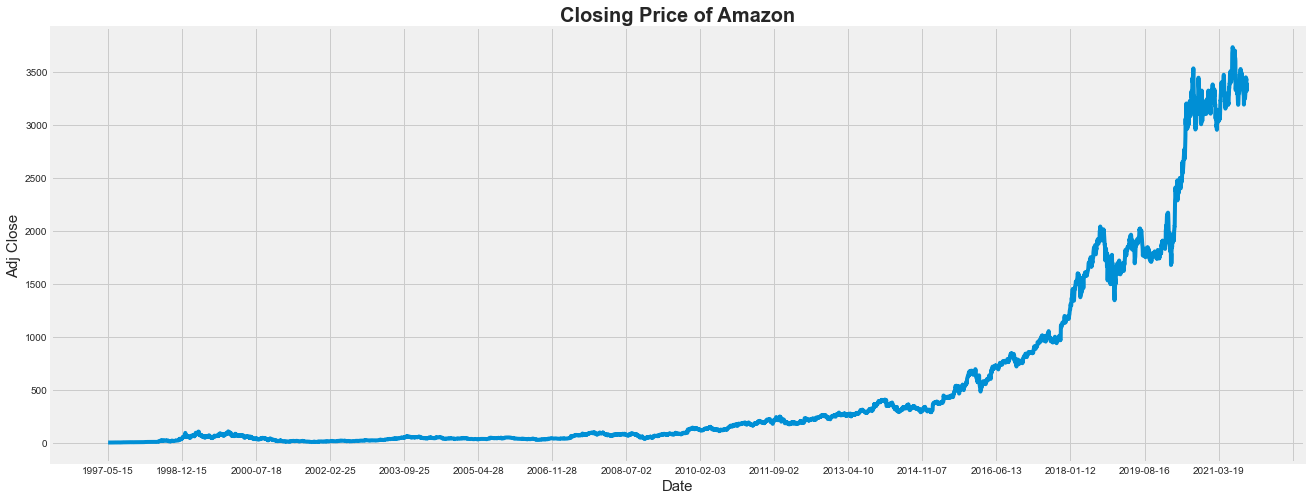

In [10]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(df['Date'], df["Adj Close"])
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.ylabel("Adj Close", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.title("Closing Price of Amazon", fontsize = 20, fontweight = "bold")
plt.show()

### Volumne of Sales
Volume of sales refers to the total number of goods or services sold during a given period of time by a company or individual. It is a measure of the quantity or amount of sales generated by a business, usually expressed in units or dollars. The volume of sales is an important metric used by businesses to evaluate their performance and growth over time. It can also be used to compare the sales performance of different products or services, identify trends and patterns in consumer behavior, and make informed business decisions.

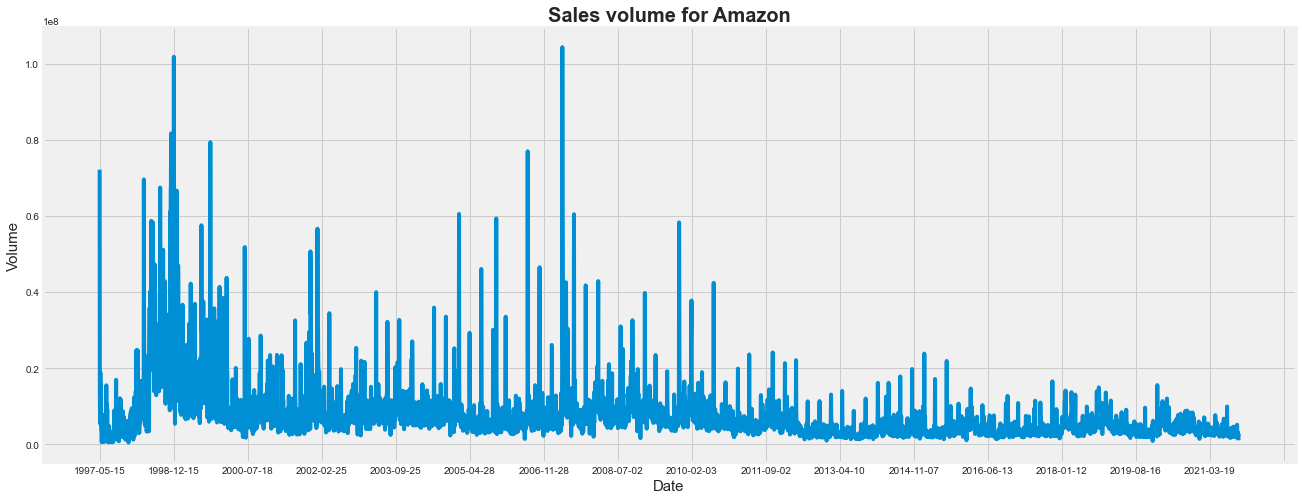

In [11]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(df['Date'], df["Volume"])
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.ylabel("Volume", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.title("Sales volume for Amazon", fontsize = 20, fontweight = "bold")
plt.show()

### Moving Average
Moving Average (MA) is a simple analysis tool that smooths out price data by creating a constantly updated average price like 20 days, 50 days, 100 days or any time period.

In [12]:
days = [20, 50, 100, 200]

for d in days:
    column_name = f"MA for {d} days"
    df[column_name] = df['Adj Close'].rolling(d).mean()


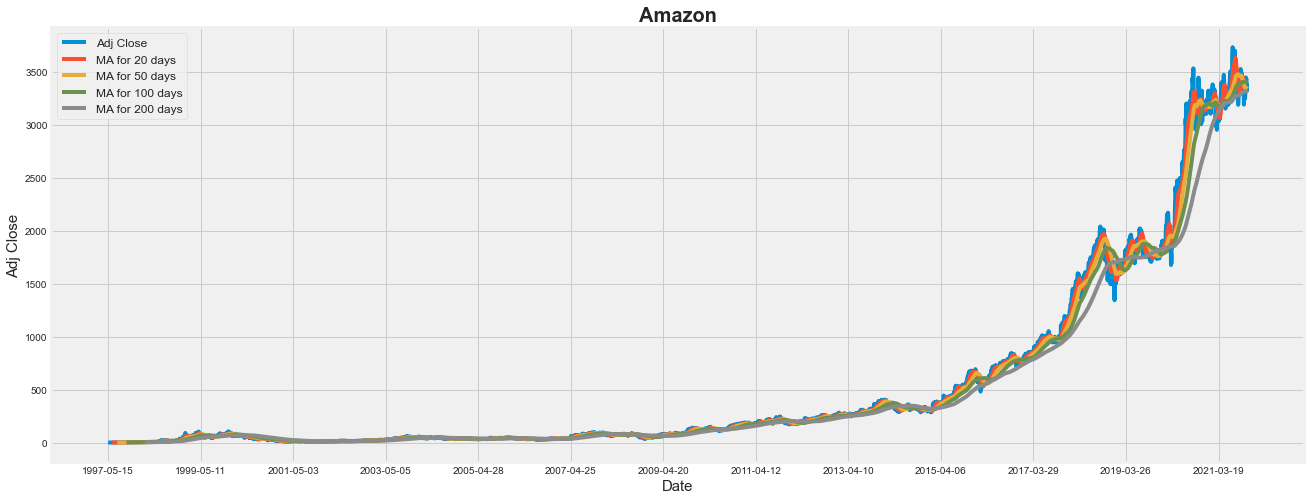

In [13]:
labels = ['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(df['Date'], df[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.ylabel("Adj Close", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.title("Amazon", fontsize = 20, fontweight = "bold")
plt.legend(labels = labels, fontsize = "large")
plt.show()

### Daily return of the stock on average

In [14]:
df['Daily Return'] = df['Adj Close'].pct_change()
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 20 days,MA for 50 days,MA for 100 days,MA for 200 days,Daily Return
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,NaN,NaN,NaN,-0.117021
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,NaN,NaN,NaN,-0.012049
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,NaN,NaN,NaN,-0.042683
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,NaN,NaN,NaN,-0.127389
...,...,...,...,...,...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400,3325.414526,3358.037007,3414.373198,3319.089994,0.005842
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800,3320.916028,3358.678008,3415.388799,3319.956945,-0.028955
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000,3316.644531,3359.206011,3416.722400,3320.645295,-0.004551
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700,3319.650037,3360.747612,3418.420901,3321.954596,0.016775


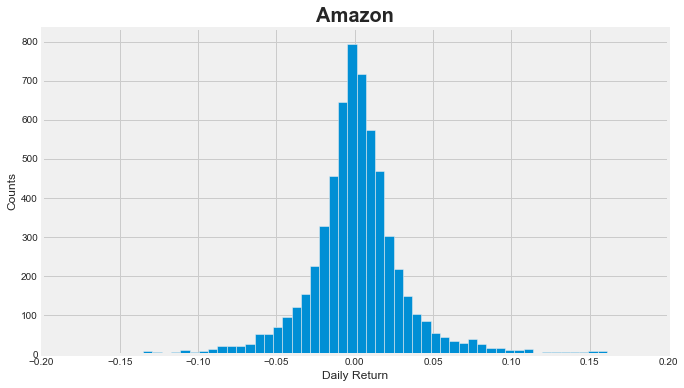

count    6154.000000
mean        0.001865
std         0.036467
min        -0.247661
25%        -0.012962
50%         0.000515
75%         0.014675
max         0.344714
Name: Daily Return, dtype: float64

In [15]:
plt.subplots(figsize = (10, 6))
plt.hist(df['Daily Return'], bins = 100)
plt.xlim(-0.2, 0.2)
plt.xlabel("Daily Return")
plt.ylabel("Counts")
plt.title("Amazon", fontsize = 20, fontweight = "bold")
plt.show()

df["Daily Return"].describe()

## Market Capitalization

In [16]:
df['Market Cap'] = df['Open'] * df['Volume']

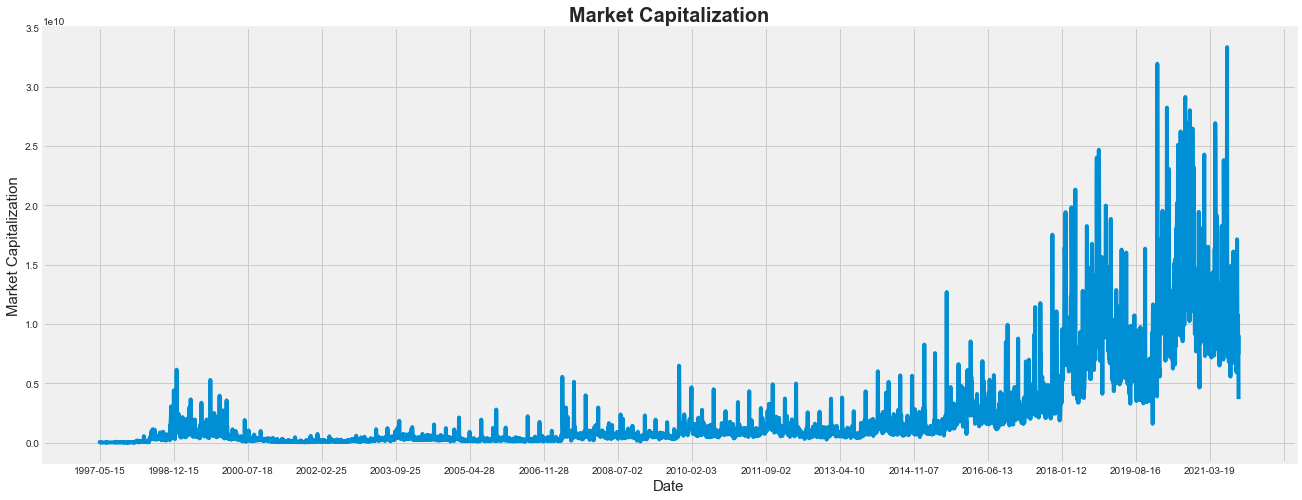

In [17]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(df['Date'], df['Market Cap'])
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Market Capitalization", fontsize = 15)
plt.title("Market Capitalization", fontsize = 20, fontweight = "bold")
plt.show()

**Largest market capitalization value**

In [18]:
df.iloc[df['Market Cap'].argmax()]

Date                2021-07-30
Open                   3347.95
High                   3368.14
Low                    3306.98
Close                  3327.59
Adj Close              3327.59
Volume                 9957100
MA for 20 days         3625.16
MA for 50 days         3453.98
MA for 100 days        3346.79
MA for 200 days        3268.93
Daily Return        -0.0756489
Market Cap         3.33359e+10
Name: 6092, dtype: object

## 3. Predicting the closing price of Amazon

In [19]:
# Date index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

# Create a new dataframe with 'Close' column
data = df.filter(['Close'])

# Convert to a numpy array
dataset = data.values

# Get the number of rows to train
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

4924

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.89802079e-01],
       [9.04734986e-01],
       [9.10129033e-01]])

In [21]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [22]:
# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train,y_train, batch_size=1024, epochs=10)

Epoch 1/10
4864/4864 [==============================] - 17s 3ms/step - loss: 0.0016
Epoch 2/10
4864/4864 [==============================] - 14s 3ms/step - loss: 3.6382e-04
Epoch 3/10
4864/4864 [==============================] - 15s 3ms/step - loss: 1.2127e-04
Epoch 4/10
4864/4864 [==============================] - 15s 3ms/step - loss: 1.0067e-04
Epoch 5/10
4864/4864 [==============================] - 15s 3ms/step - loss: 4.6329e-05
Epoch 6/10
4864/4864 [==============================] - 15s 3ms/step - loss: 3.2478e-05
Epoch 7/10
4864/4864 [==============================] - 15s 3ms/step - loss: 2.4220e-05
Epoch 8/10
4864/4864 [==============================] - 15s 3ms/step - loss: 1.6235e-05
Epoch 9/10
4864/4864 [==============================] - 15s 3ms/step - loss: 1.4117e-05
Epoch 10/10
4864/4864 [==============================] - 15s 3ms/step - loss: 1.0449e-05


In [23]:
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert it to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

90.4712483199301

/Users/baegdeughwan/opt/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


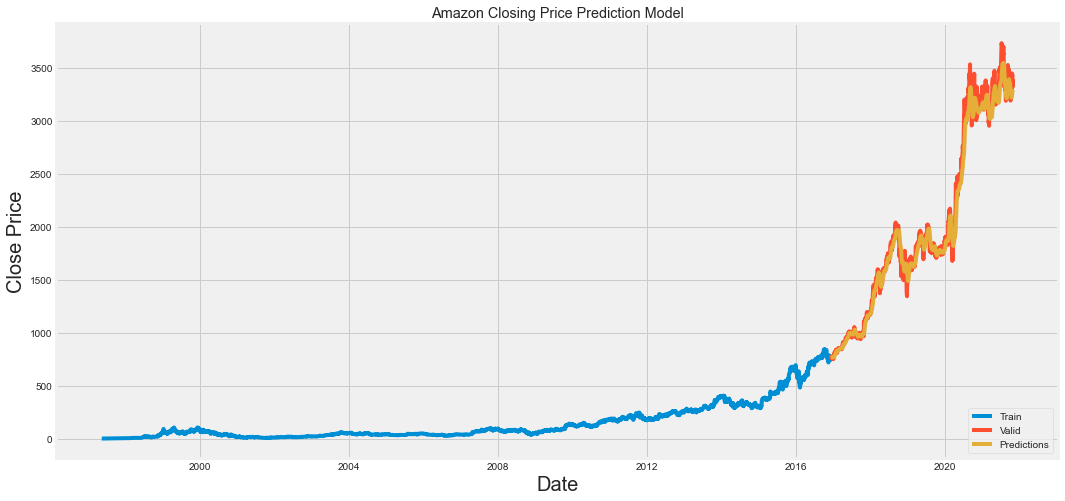

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize
plt.figure(figsize=(16,8))
plt.title('Amazon Closing Price Prediction Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [25]:
valid

,Close,Predictions
Date,,
2016-12-07,770.419983,762.772888
2016-12-08,767.330017,762.799683
2016-12-09,768.659973,763.175415
2016-12-12,760.119995,763.832275
2016-12-13,774.340027,764.233154
...,...,...
2021-10-21,3435.010010,3262.203369
2021-10-22,3335.550049,3276.406250
2021-10-25,3320.370117,3285.375732
